In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter(x, y, bins=50, xlim=None, ylim=None, filename=None):
    fig = plt.figure(figsize=(10, 10))
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    
import matplotlib.animation as animation

OSError: rays_y_0.00.dat not found.

In [6]:

rays_y = np.loadtxt("rays_y_0.00.dat")

m = np.logical_and(np.abs(rays_y[:,0]) <= 20, np.abs(rays_y[:,1]) <= 20)
x = rays_y[:,0][m]
y = rays_y[:,1][m]
density_scatter(x, y, bins=[200, 200])

m = np.logical_and(np.abs(rays_y[:,0]) <= 15, np.abs(rays_y[:,1]) <= 15)
x = rays_y[:,0][m]
y = rays_y[:,1][m]
density_scatter(x, y, bins=[200, 200])

m = np.logical_and(np.abs(rays_y[:,0]) <= 30, np.abs(rays_y[:,1]) <= 30)
x = rays_y[:,0][m]
y = rays_y[:,1][m]
density_scatter(x, y, bins=[500, 500])

SyntaxError: 'return' outside function (<ipython-input-6-5e3ed6df88ac>, line 1)

In [129]:
def get_image_data(filename, gamma=0.6, debug=False, hide_max=False):
    
    extent = None
    image_size = None
    with open(filename, 'r') as f:
        header0 = f.readline().strip()
        header1 = f.readline().strip()
        header2 = f.readline().strip()

        _s = re.split('\(|\,|\)', header0)
        _x = re.split('\(|\,|\)', header1)
        _y = re.split('\(|\,|\)', header2)
        image_size = [int(_s[1]),int(_s[2])]
        extent = [float(_x[1]),float(_x[2]),float(_y[1]),float(_y[2])]
    image = np.loadtxt(filename).reshape(image_size)
    if (debug):
        _all = image.shape[0] * image.shape[1]
        _z = image[image == 0].shape[0]
        print(f"{filename}")
        print(f"\tzeros: {_z} ({100 * _z/_all}%)")
        print(f"\tmean & std: {np.mean(image)} +- {np.std(image)}")
    
    img = np.zeros_like(image)
    img[image > 0] = image[image > 0]**gamma
    if img[img == np.max(img)].shape[0] < 5 and hide_max:
        img[img == np.max(img)] = np.mean(img) # removing center-of-mass pixel with extreame amplification
    return img, extent

output/reference/image_0.00.dat
	zeros: 1000000 (100.0%)
	mean & std: 0.0 +- 0.0
output/reference/image_0.90.dat
	zeros: 0 (0.0%)
	mean & std: 12.09359 +- 9.395471510887573


<IPython.core.display.Javascript object>


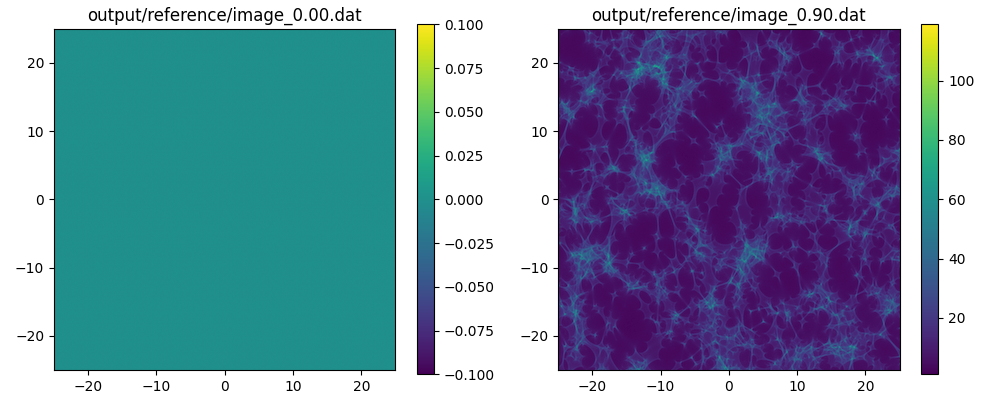

In [131]:
filename1 = "output/reference/image_0.00.dat"
filename2 = "output/reference/image_0.90.dat"

img1, extent1 = get_image_data(filename1, gamma=1, debug=True)
img2, extent2 = get_image_data(filename2, gamma=1, debug=True)

fig, (ax1, ax2) = plt.subplots(figsize=(10,4), ncols=2)
pos1 = ax1.imshow(img1, interpolation='bessel', extent=extent1, origin='lower')
pos2 = ax2.imshow(img2, interpolation='bessel', extent=extent2, origin='lower')
ax1.set_title(filename1)
ax2.set_title(filename2)
fig.colorbar(pos1, ax=ax1)
fig.colorbar(pos2, ax=ax2)
fig.tight_layout()
plt.show()

output/test/image_0.00.dat
	zeros: 0 (0.0%)
	mean & std: 16.0 +- 2.0594717769369892
output/test/image_0.00.dat
	zeros: 0 (0.0%)
	mean & std: 16.0 +- 2.0594717769369892


<IPython.core.display.Javascript object>


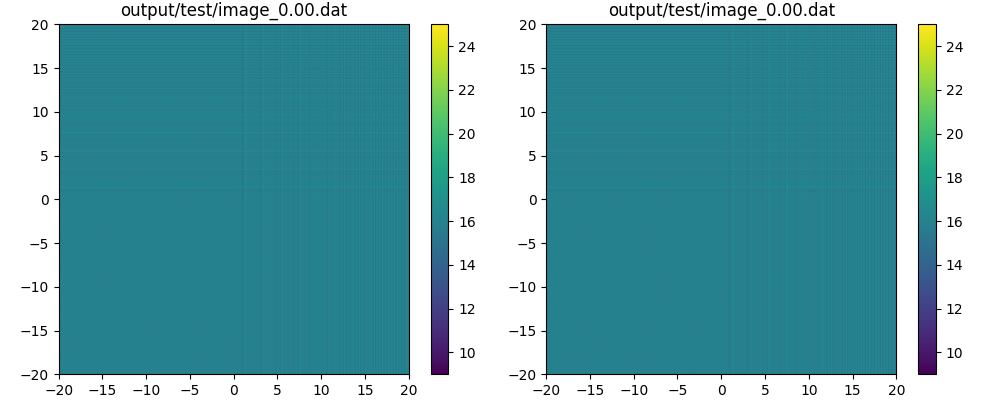

In [133]:
filename1 = "output/test/image_0.00.dat"
filename2 = "output/test/image_0.00.dat"

img1, extent1 = get_image_data(filename1, gamma=1, debug=True)
img2, extent2 = get_image_data(filename2, gamma=1, debug=True)

fig, (ax1, ax2) = plt.subplots(figsize=(10,4), ncols=2)
pos1 = ax1.imshow(img1, interpolation='bessel', extent=extent1, origin='lower')
pos2 = ax2.imshow(img2, interpolation='bessel', extent=extent2, origin='lower')
ax1.set_title(filename1)
ax2.set_title(filename2)
fig.colorbar(pos1, ax=ax1)
fig.colorbar(pos2, ax=ax2)
fig.tight_layout()
plt.show()

In [ ]:
a=1

<IPython.core.display.Javascript object>


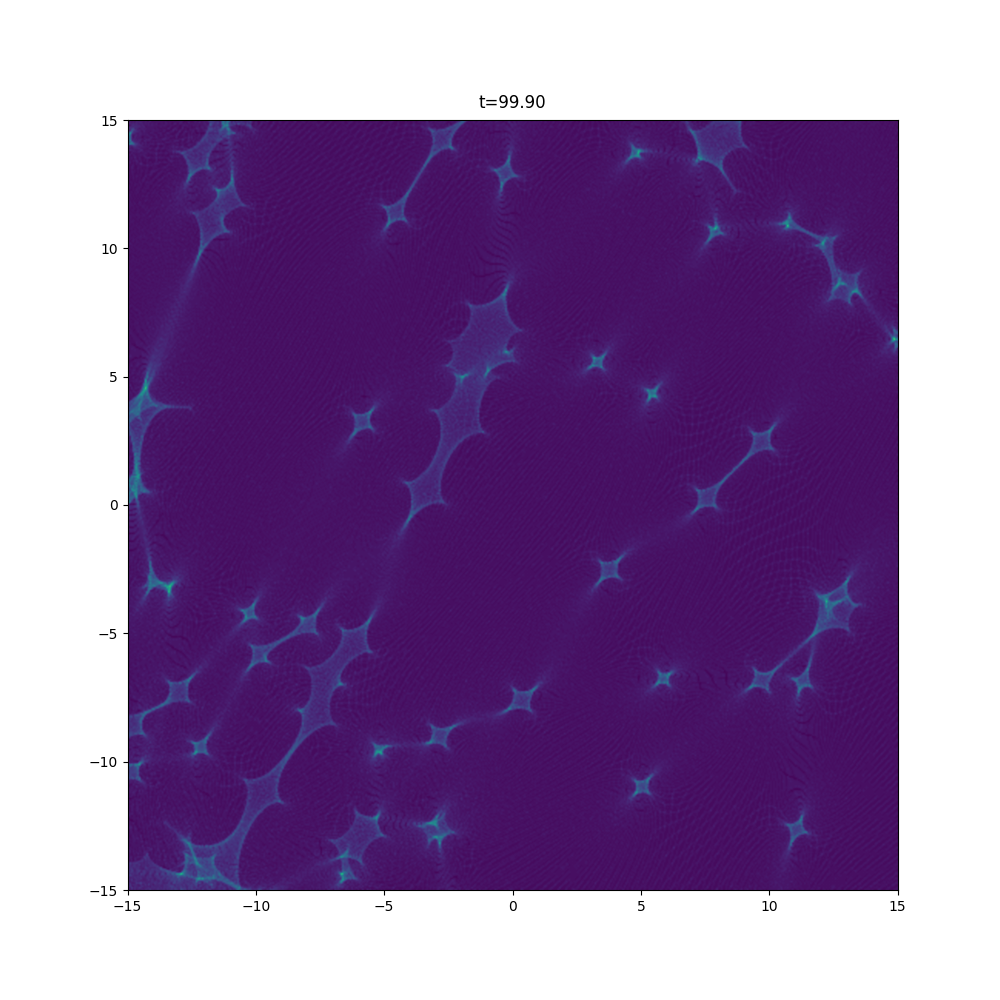

In [81]:
fig, ax = plt.subplots(figsize=(10,10))

ims = []

for i in np.arange(0, 100, 0.1):
    filename = "output/reference/image_%.2f.dat" % i
    img, extent = get_image_data(filename, gamma=1)
    title = plt.text(0.5,1.01, "t=%.2f" % i, ha="center",va="bottom", transform=ax.transAxes, fontsize="large")
    text = ax.text('','','')
    im = ax.imshow(img, extent=extent, origin='lower', interpolation='bicubic')
    ims.append([text, im, title])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False, repeat=False)
ani.save("images/reference_moving_stars.mp4")
plt.show()

<IPython.core.display.Javascript object>


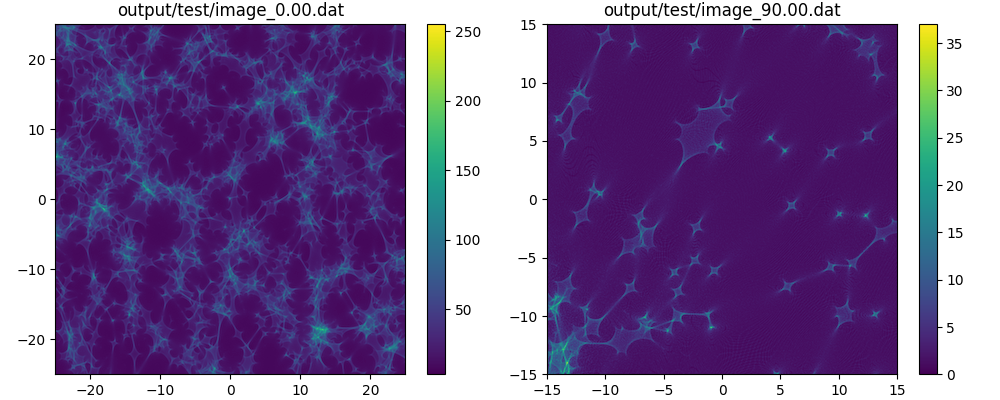

In [99]:
filename1 = "output/test/image_0.00.dat"
filename2 = "output/test/image_90.00.dat"

img1, extent1 = get_image_data(filename1, gamma=1)
img2, extent2 = get_image_data(filename2, gamma=1)

fig, (ax1, ax2) = plt.subplots(figsize=(10,4), ncols=2)
pos1 = ax1.imshow(img1, interpolation='bessel', extent=extent1, origin='lower')
pos2 = ax2.imshow(img2, interpolation='bessel', extent=extent2, origin='lower')
ax1.set_title(filename1)
ax2.set_title(filename2)
fig.colorbar(pos1, ax=ax1)
fig.colorbar(pos2, ax=ax2)
fig.tight_layout()
plt.show()

In [39]:
import pandas as pd

In [41]:
def get_lc_data(filename):
    data = np.loadtxt(filename)
    df = pd.DataFrame(data=data, columns=["y1", "y2", "norm", "ampl"])
    return df

output/test/image_0.00.dat
	zeros: 544098 (54.4098%)
	mean & std: 29.40715 +- 32.32004218557737


<IPython.core.display.Javascript object>


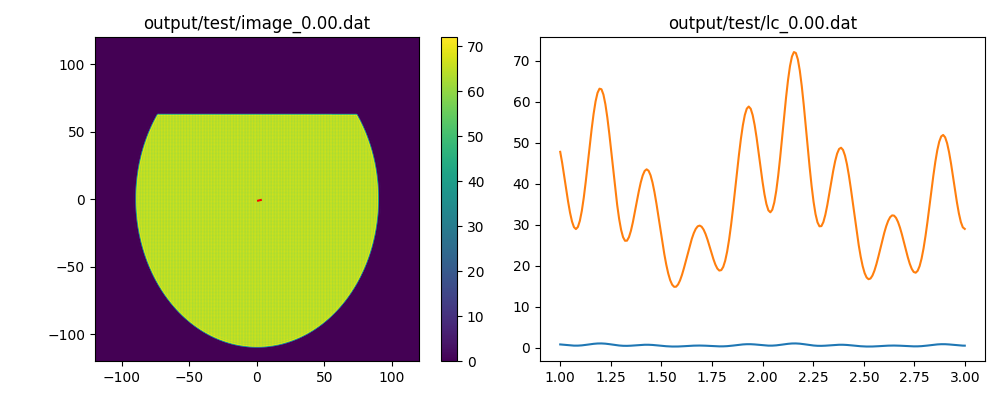

In [151]:
filename1 = "output/test/image_0.00.dat"
filename2 = "output/test/lc_0.00.dat"

img1, extent1 = get_image_data(filename1, gamma=1, debug=True)
lc = get_lc_data(filename2)

fig, (ax1, ax2) = plt.subplots(figsize=(10,4), ncols=2)
pos1 = ax1.imshow(img1, interpolation='bessel', extent=extent1, origin='lower')
ax1.plot(lc['y1'], lc['y2'], color='red')
#pos2 = ax2.plot(lc['y1'], (lc['ampl']/lc['norm'])/(2*np.pi*0.01), '-')
pos2 = ax2.plot(lc['y1'], lc['norm'], '-')
pos2 = ax2.plot(lc['y1'], lc['ampl'], '-')
ax1.set_title(filename1)
ax2.set_title(filename2)
fig.colorbar(pos1, ax=ax1)
fig.tight_layout()
plt.show()

In [141]:
np.mean(lc['ampl'])/np.mean(lc['norm'])

/data/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [142]:
np.mean(lc['norm']), np.std(lc['norm'])

(0.0, 0.0)

In [143]:
np.mean(lc['ampl']), np.std(lc['ampl'])

(0.0, 0.0)

In [146]:
np.mean(np.loadtxt("output/test/image_0.00.dat"))

16.062647